In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [3]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

In [4]:
df.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [5]:
df['ordermonth'] = df['order_date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').
                        strftime('%Y-%m'))

# buat kolom GMV
df['gmv'] = df['item_price']*df['quantity']

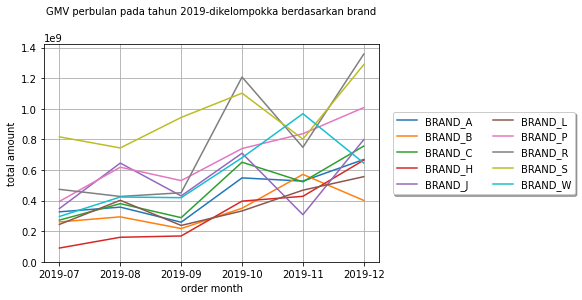

In [8]:
# buat multiline chart

df.groupby(['ordermonth','brand'])['gmv'].sum().unstack().plot()
plt.title('GMV perbulan pada tahun 2019-dikelompokka berdasarkan brand',loc='center',fontsize=10,pad=30)
plt.ylabel('total amount')
plt.xlabel('order month')
plt.ylim(ymin=0)
plt.grid(color='darkgrey')
# kustom legend
plt.legend(loc='right', bbox_to_anchor=(1.6,0.5), shadow=True,ncol=2)
plt.show()

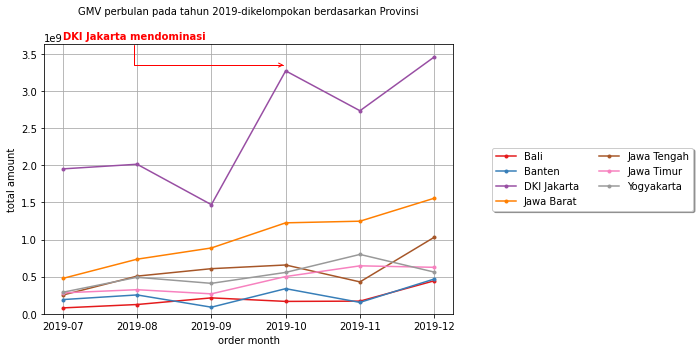

In [15]:
# buat multiline chart berdasar prov

df.groupby(['ordermonth','province'])['gmv'].sum().unstack().plot(marker='.',cmap='Set1')
plt.title('GMV perbulan pada tahun 2019-dikelompokan berdasarkan Provinsi',loc='center',fontsize=10,pad=30)
plt.ylabel('total amount')
plt.xlabel('order month')
plt.ylim(ymin=0)
plt.grid(color='darkgrey')
# kustom legend
plt.legend(loc='right', bbox_to_anchor=(1.6,0.5), shadow=True,ncol=2)
# kita juga bisa melakukan kustom dibagian anotasinya
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000), 
             xytext=(0, 3700000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='angle',
                             color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

# bisa kustom cmap ini digunakan untuk bisa mendfiniskan colour utk stiap linenya

- xytext: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)
- arrowprops:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:
- arrowstyle: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.
connectionstyle: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.
- color: menentukan warna dari panah

In [18]:
'''
“Sudah aku sampaikan ke kepala cabang. Ini insight yang menarik menurut beliau. Ada rikues kalau provinsi ‘other’ ini, kita analisis lagi di lain waktu saja dan fokuskan untuk analisis behavior transaksi di DKI Jakarta pada bulan Oktober-Desember 2019 ini, karena trend-nya mirip dengan overall GMV. Kita fokuskan ke sana ya,” pinta Senja.
“Oke, aku coba cek dulu perbandingan GMV di kota-kota di DKI Jakarta itu seperti apa,” sahutku segera beraksi.
“Iya, berhubung kita mau fokus ke provinsi DKI Jakarta dan bulan Oktober-Desember 2019, kita filter saja datanya dan disimpan ke dataframe baru",
'''

df_dki_q4 = df[(df['province']=='DKI Jakarta')&(df['ordermonth']>='2019-10')]

df_dki_q4.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,ordermonth,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000


In [ ]:
# membuat pie chart

